# PBL model analysis
This notebook analyzes output from Prof Dennis Baldocchi's MATLAB code for a growing and humidifying planetary boundary layer. See thesis for more information on the model.  

**Input:** 
 - None

**Output:**
 - Figures

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 
import seaborn as sns

#increase resolution of plots in jupyter notebook
%config InlineBackend.figure_format = 'retina'

In [2]:
RH = [0.9900, 0.1108, 0.8737, 0.7667, 0.6796, 0.5379, 0.5046, 0.4875, 0.4779,
     0.6587, 0.7971, 0.9133, 0.8196, 0.7025, 0.5492, 0.5125, 0.4929, 0.4821,
     1.0258, 0.9904, 0.9408, 0.8613, 0.7542, 0.5796, 0.5333, 0.5062, 0.4933,
     1.0471, 1.0117, 0.9688, 0.8975, 0.7975, 0.6083, 0.5529, 0.5204, 0.5029,
     1.0679, 1.0342, 0.9912, 0.9267, 0.8338, 0.6358, 0.5729, 0.5350, 0.5133]

In [3]:
len(RH)

45

In [4]:
fRH = [0.9985, np.nan, 0.9251, 0.7620, 0.5715, 0.2366, 0.1717, 0.1413, 0.1261,
      0.8101, 0.0338, 0.9624, 0.8541, 0.6261, 0.2634, 0.1889, 0.1531, 0.1354,
      1.0011, 0.9985, 0.9804, 0.9111, 0.7381, 0.3357, 0.2350, 0.1835, 0.1597,
      np.nan, 1.0009, 0.9928, 0.9490, 0.8186, 0.4070, 0.2817, 0.2155, 0.1828,
      np.nan, np.nan, 0.9988, 0.9723, 0.8758, 0.4757, 0.3295, 0.2483, 0.2065]

In [5]:
pbl = [0.9342, 0.3534, 0.8412, 0.7572, 0.5695, 0.2380, 0.1335, 0.0711, 0.0367,
      1.5611, 1.2804, 0.8025, 0.7275, 0.6066, 0.2743, 0.1577, 0.0853, 0.0444,
      0.9360, 0.9088, 0.8659, 0.7981, 0.6915, 0.3667, 0.2245, 0.1266, 0.0676,
      0.9587, 0.9437, 0.9110, 0.8542, 0.7622, 0.4546, 0.2951, 0.1738, 0.0955,
      0.9831, 0.9732, 0.9492, 0.9014, 0.8218, 0.5355, 0.3661, 0.2249, 0.1272]

In [6]:
#clean data
pbl_cleaned, RH_cleaned, fRH_cleaned = [],[],[]
for i in range(len(pbl)): 
    if (pbl[i] <= 1) and (fRH[i] <= 1) and (np.isnan(fRH[i])==False): 
        pbl_cleaned.append(pbl[i])
        RH_cleaned.append(RH[i])
        fRH_cleaned.append(fRH[i])

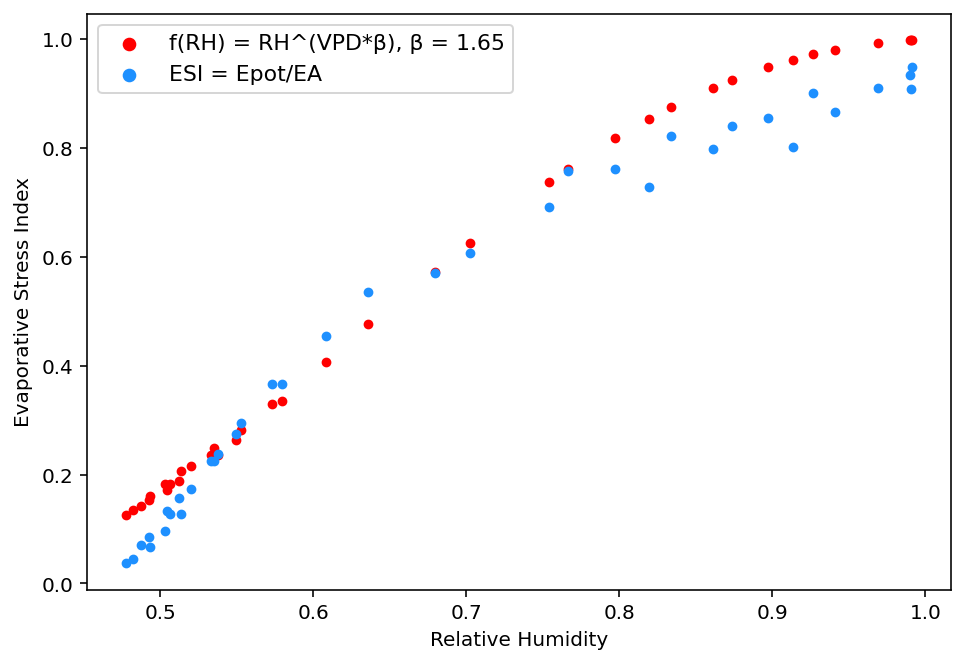

In [7]:
#initialize figure and axes
fig = plt.figure(figsize = (6,4))
ax = plt.axes([0,0,1,1])

#plot data
ax.scatter(RH_cleaned, fRH_cleaned, s = 15, color = 'red', label = 'f(RH) = RH^(VPD*β), β = 1.65');
ax.scatter(RH_cleaned, pbl_cleaned, s = 15, color = 'dodgerblue', label = 'ESI = Epot/EA');

#add descriptive info to plot
plt.ylabel('Evaporative Stress Index')
plt.xlabel('Relative Humidity')
plt.legend(markerscale = 1.5, fontsize = 11)

#save and display figure
plt.savefig('figs/PBL_model/model_vs_pbl.png', bbox_inches='tight', dpi = 250)
plt.show()

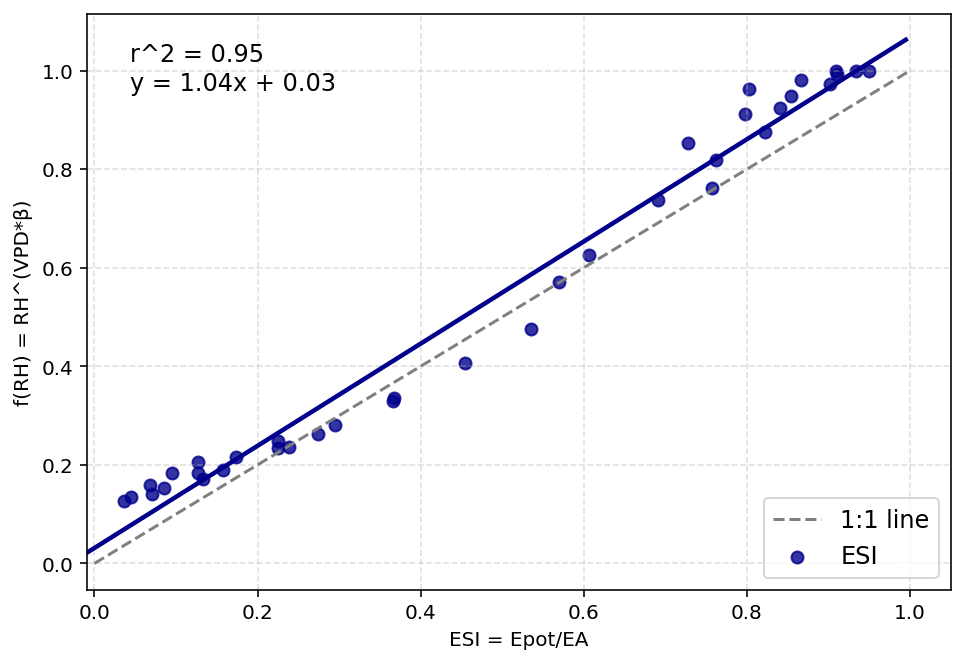

In [8]:
#initialize figure and axes
fig = plt.figure(figsize = (6,4))
ax = plt.axes([0,0,1,1])
gridlines = plt.grid(b = True, linestyle = '--', alpha = 0.4) #add gridlines 

ax = sns.regplot(x=pbl_cleaned, y=fRH_cleaned, color = 'darkblue', ci=None, truncate=False, label = 'ESI')

#ax.scatter(pbl_cleaned, fRH_cleaned,  s = 12, color = 'darkblue', label = 'Evaporative Stress Index');
ax.plot(np.arange(0,1+0.1, 0.1),np.arange(0,1+0.1, 0.1), linestyle='dashed',color = 'grey', label = '1:1 line')

#make plot pretty 
plt.xticks(np.arange(0,1+0.2, 0.2))
plt.xlabel('ESI = Epot/EA')
plt.ylabel('f(RH) = RH^(VPD*β)')
plt.legend(fontsize = 12, loc = 'lower right')

#add r^2 into legend 
r_squared = round(r2_score(pbl_cleaned, fRH_cleaned),2)
ax.text(x = 0.05, y = 0.95, s = 'r^2 = ' + str(r_squared), horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, transform = ax.transAxes, bbox = {'facecolor':'none', 'edgecolor':'none'})

#add regression line text
m, b = np.polyfit(pbl_cleaned, fRH_cleaned, 1)
ax.text(x = 0.05, y = 0.9, s = 'y = ' + str(round(m,2)) + 'x + ' + str(round(b,2)), horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, transform = ax.transAxes, bbox = {'facecolor':'none', 'edgecolor':'none'})

#save and display figure
plt.savefig('figs/PBL_model/regression_analysis_model.png', bbox_inches='tight', dpi = 250)
plt.show()